# Load modules and data 

In [1]:
import os
import pandas as pd 
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import seaborn as sns

# load data
from keras.datasets import mnist

## preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

## For dimension reduction
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

## Machine learning models for KNN classification
from sklearn.neighbors import KNeighborsClassifier

2024-07-02 15:31:55.443630: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-02 15:31:55.443665: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-02 15:31:55.444899: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-02 15:31:55.452381: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-02 15:31:56.480077: W tensorflow/compiler/tf2

# Data visualisation

train_X: (60000, 28, 28)
train_Y: (60000,)
test_X:  (10000, 28, 28)
test_Y:  (10000,)


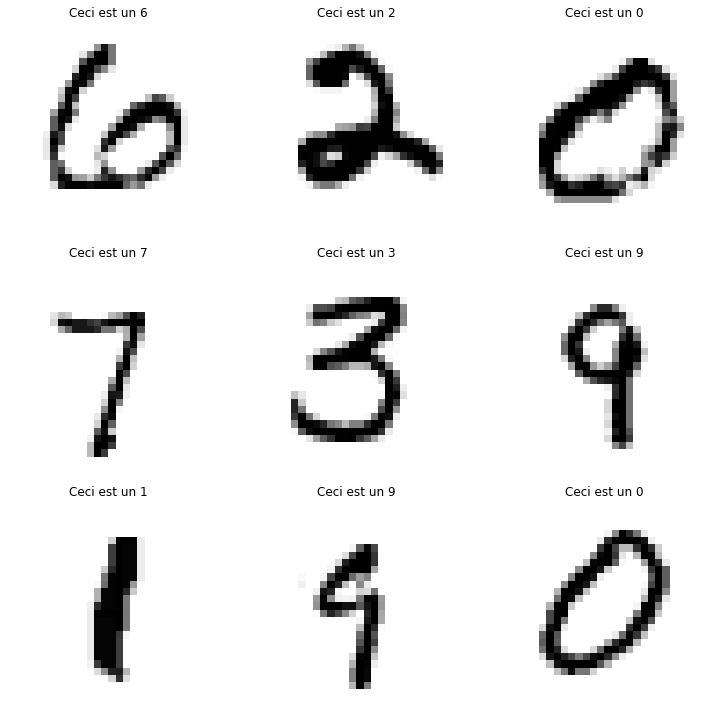

In [2]:
 
#loading
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()
 
#shape of dataset
print('train_X: ' + str(train_X.shape))
print('train_Y: ' + str(train_Y.shape))
print('test_X:  '  + str(test_X.shape))
print('test_Y:  '  + str(test_Y.shape))
 

# Create plt objects
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for ax in axes.flat:
    i = np.random.randint(len(train_X)) #Chose a random elt of the dataset train 
    ax.imshow(train_X[i], cmap='gray_r') 
    ax.set_title(f"Ceci est un {train_Y[i]}")
    ax.axis('off')


# put more space between each image
plt.tight_layout(h_pad=2,w_pad=5)
plt.show()

# class distribution

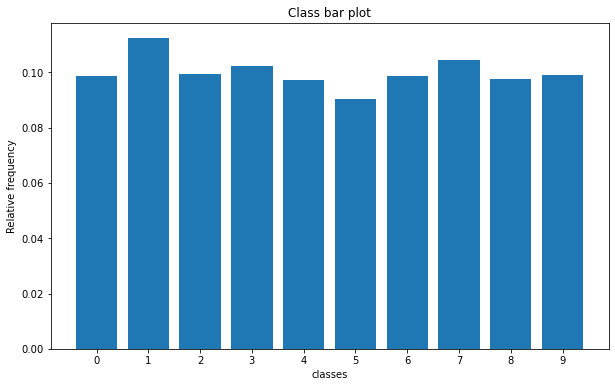

In [14]:
## check the size of each class
E = [len(train_Y[train_Y==i])/len(train_Y) for i in np.unique(train_Y)]


dictionnaire = dict(zip(np.unique(train_Y), E))

keys = np.sort(list(dictionnaire.keys()))

values = [dictionnaire[key] for key in keys]


# Créez un histogramme
plt.figure(figsize=(10, 6))
plt.bar(keys, values)
plt.xlabel('classes')
plt.ylabel('Relative frequency')
plt.title('Class bar plot')
plt.xticks(keys)  # Afficher toutes les classes sur l'axe des x
plt.show()

As we can see from the graph above, the classes seem balanced.

# PCA visualisation 

In [8]:

class Reshaper(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.reshape(X.shape[0], -1)

In [9]:
# make a pipeline_pca avec StandardScaler et PCA
pipeline_pca = Pipeline([
    ('reshaper', Reshaper()),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.9))
])


# Entraînement du pipeline sur les données train_X
train_X_pca = pipeline_pca.fit_transform(train_X)

test_X_pca = pipeline_pca.transform(test_X)

In [16]:
print(pipeline_pca.named_steps["pca"].explained_variance_ratio_.cumsum())

print(pipeline_pca.named_steps["pca"].components_.shape)



[0.05646717 0.09724989 0.13464369 0.16349484 0.18870593 0.21064863
 0.22988207 0.24734006 0.26269099 0.27670818 0.29012561 0.30216303
 0.31330873 0.32420796 0.33449446 0.34443932 0.35380315 0.36301361
 0.37194798 0.3806471  0.38892074 0.39695491 0.40460336 0.41202109
 0.41917402 0.42609249 0.43293384 0.43950059 0.44581736 0.45194656
 0.45790911 0.46378627 0.46950219 0.47512526 0.48067208 0.48605627
 0.49136809 0.49656415 0.50164626 0.50644631 0.51121087 0.51590227
 0.52044576 0.52495921 0.52942885 0.53386268 0.53824483 0.54254865
 0.54681743 0.5510539  0.55510086 0.55909534 0.5630699  0.56700811
 0.57086624 0.57465667 0.57841069 0.58211845 0.5857679  0.5893609
 0.59288472 0.59636266 0.59980677 0.60320546 0.606565   0.60991386
 0.6132325  0.61646276 0.61962553 0.62275797 0.62586528 0.62893771
 0.63198685 0.63501403 0.63800888 0.64098649 0.64393701 0.64684139
 0.64970995 0.65256673 0.65540071 0.65822698 0.66102249 0.66381554
 0.66660073 0.66937529 0.6721343  0.67487657 0.67759067 0.68028

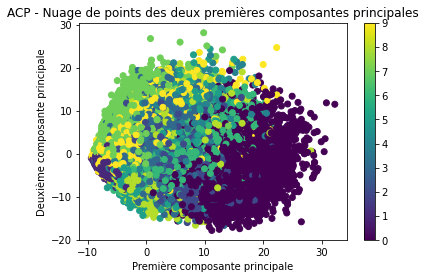

In [17]:

plt.scatter(train_X_pca[:, 0], train_X_pca[:, 1], c=train_Y)

plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.title('ACP - Nuage de points des deux premières composantes principales')
plt.colorbar()
plt.show()

# KNN with new features

In [10]:
parm_grid = {'n_neighbors':np.arange(1,13),
             'metric':['euclidean']}


grid = GridSearchCV(KNeighborsClassifier(),parm_grid, cv=5,verbose=3,)
#cv pour cross validation avec 5 partitions, tournante sur 4 train et 1 pour test 
# parm_grid dico pour les tests 

grid.fit(train_X_pca,train_Y) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ...metric=euclidean, n_neighbors=1;, score=0.948 total time=   5.2s
[CV 2/5] END ...metric=euclidean, n_neighbors=1;, score=0.952 total time=   5.2s
[CV 3/5] END ...metric=euclidean, n_neighbors=1;, score=0.949 total time=   6.9s
[CV 4/5] END ...metric=euclidean, n_neighbors=1;, score=0.947 total time=   6.1s
[CV 5/5] END ...metric=euclidean, n_neighbors=1;, score=0.952 total time=   7.2s
[CV 1/5] END ...metric=euclidean, n_neighbors=2;, score=0.941 total time=   5.5s
[CV 2/5] END ...metric=euclidean, n_neighbors=2;, score=0.941 total time=   5.5s
[CV 3/5] END ...metric=euclidean, n_neighbors=2;, score=0.943 total time=   5.4s
[CV 4/5] END ...metric=euclidean, n_neighbors=2;, score=0.939 total time=   7.1s
[CV 5/5] END ...metric=euclidean, n_neighbors=2;, score=0.946 total time=   5.4s
[CV 1/5] END ...metric=euclidean, n_neighbors=3;, score=0.951 total time=   5.4s
[CV 2/5] END ...metric=euclidean, n_neighbors=3;

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])},
             verbose=3)

In [11]:
print("Les meilleurs paramètres:\n",grid.best_params_)

best_model = grid.best_estimator_
print("best score  données train= ", best_model.score(train_X_pca,train_Y))
print("best score  données test = ", best_model.score(test_X_pca,test_Y))

Les meilleurs paramètres:
 {'metric': 'euclidean', 'n_neighbors': 3}
best score  données train=  0.9767833333333333
best score  données test =  0.9538


# Confusion matrix and metrics

In [12]:
y_pred_test = best_model.predict(test_X_pca)

accuracy = len(y_pred_test[y_pred_test == test_Y])/len(y_pred_test)

print(f"Accuracy = {accuracy}")

Accuracy = 0.9538


Text(0.5, 1.0, 'Confusion Matrix')

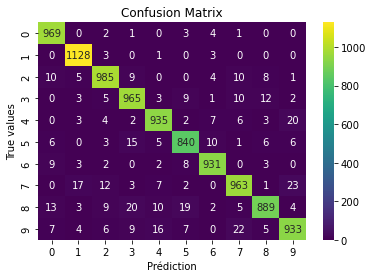

In [14]:

confusion_matrix = confusion_matrix(test_Y,y_pred_test)

sns.heatmap(confusion_matrix,annot=True, fmt="d", cmap="viridis")

# Ajouter des étiquettes
plt.xlabel('Prédiction')
plt.ylabel('True values')
plt.title('Confusion Matrix')


In [27]:
def F1_score(index,confusion_matrix):
    True_positive = confusion_matrix[index,index]
    True_negative = np.delete(confusion_matrix.diagonal(),index).sum()
    False_positive = np.delete(confusion_matrix[:,index],index).sum()
    False_negative = np.delete(confusion_matrix[index,:],index).sum()
    
    precision = True_positive / (True_positive + False_positive) if (True_positive + False_positive) > 0 else 0
    recall = True_positive / (True_positive + False_negative) if (True_positive + False_negative) > 0 else 0
    
    if precision + recall == 0:
        return 1e-6
    
    f1_score = 2 * (precision * recall) / (precision + recall)
    return f1_score


for i in range(confusion_matrix.shape[0]):
    print(f"F1 score pour la classe {i}: {F1_score(i, confusion_matrix)}")

F1 score pour la classe 0: 0.9719157472417252
F1 score pour la classe 1: 0.9804432855280313
F1 score pour la classe 2: 0.954920019389239
F1 score pour la classe 3: 0.9488692232055064
F1 score pour la classe 4: 0.9535951045385008
F1 score pour la classe 5: 0.9427609427609428
F1 score pour la classe 6: 0.9697916666666667
F1 score pour la classe 7: 0.9413489736070382
F1 score pour la classe 8: 0.9352972119936874
F1 score pour la classe 9: 0.9339339339339339


# Issues

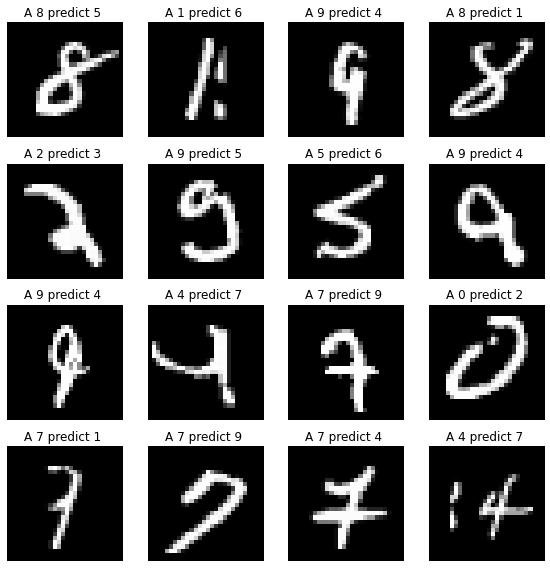

In [44]:
x_faux = test_X[y_pred_test!=test_Y]
y_pred_faux = y_pred_test[y_pred_test!=test_Y]
y_faux = test_Y[y_pred_test!=test_Y]


# Créez une figure et une grille de sous-graphiques
fig, axes = plt.subplots(4, 4, figsize=(8, 8))

for _, ax in enumerate(axes.flat):
    i = np.random.randint(len(x_faux))
    ax.imshow(x_faux[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f"A {y_faux[i]} predict {y_pred_faux[i]} ")# {y_pred_faux[i]} 

# Ajustez l'espacement entre les sous-graphiques si nécessaire
plt.tight_layout(h_pad=1,w_pad=1)

# Affichez la figure
plt.show()